In [1]:
from PIL import Image, ImageFilter
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.color import rgb2gray, rgb2yuv, yuv2rgb


def weighted_psnr(ref, img):
    num_channels = ref.shape[2]
    assert num_channels in [1, 3]
    if num_channels == 3:
        ref_yuv = rgb2yuv(ref)
        img_yuv = rgb2yuv(img)

        return (
            4 * min(60, psnr(ref_yuv[..., 0], img_yuv[..., 0]))
            + min(60, psnr(ref_yuv[..., 1], img_yuv[..., 1]))
            + min(60, psnr(ref_yuv[..., 2], img_yuv[..., 2]))
        ) / 6
    else:
        return psnr(ref, img)

In [2]:
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt

def compare_compressors(image_path):
    reference = Image.open(image_path)
    if reference.mode != 'RGB':
        reference = reference.convert('RGB')
    image_path_without_extension = Path(image_path).stem

    jpeg_compressed_path = image_path_without_extension + ".jpg"
    fractal_compressed_path = image_path_without_extension + "fractal.png"
    fractal_stream_path = image_path_without_extension + ".fract"
    print(f"saving jpeg compressed to {jpeg_compressed_path} and fractal compressed to {fractal_stream_path}")

    jpeg_psnr = []
    jpeg_sizes = []
    fractal_psnr = []
    fractal_sizes = []

    for i in range(0, 100):
        reference.save(jpeg_compressed_path, "JPEG", quality=i)
        jpeg_compressed = Image.open(jpeg_compressed_path)
        jpeg_sizes.append(os.path.getsize(jpeg_compressed_path))
        jpeg_psnr.append(weighted_psnr(np.array(reference), np.array(jpeg_compressed)))
        if jpeg_sizes[-1] >= 15000:
            break

    for size_bytes in range(500, 15000, 500):
        os.system(f"./fcomp {image_path} {size_bytes} {fractal_compressed_path} {fractal_stream_path}")
        fractal_compressed = Image.open(fractal_compressed_path)
        fractal_sizes.append(os.path.getsize(fractal_stream_path))
        fractal_psnr.append(weighted_psnr(np.array(reference), np.array(fractal_compressed)))

    plt.plot(jpeg_sizes, jpeg_psnr, label="jpeg", marker="o")
    plt.plot(fractal_sizes, fractal_psnr, label="fractal", marker="o")
    plt.grid()
    plt.legend()
    plt.xlabel("size")
    plt.ylabel("psnr")
    plt.title(image_path)
    plt.xlim(0, 16000)
    plt.show()


saving jpeg compressed to Lenna256.jpg and fractal compressed to Lenna256.fract
PSNR: 23.1496
PSNR: 25.6241
PSNR: 26.8846
PSNR: 27.9281
PSNR: 28.7938
PSNR: 29.4622
PSNR: 30.065
PSNR: 30.6302
PSNR: 31.1092
PSNR: 31.5415
PSNR: 31.9596
PSNR: 32.3865
PSNR: 32.7636
PSNR: 33.121
PSNR: 33.4952
PSNR: 33.8426
PSNR: 34.1826
PSNR: 34.4787
PSNR: 34.7686
PSNR: 35.0497
PSNR: 35.3132
PSNR: 35.6001
PSNR: 35.8615
PSNR: 36.1104
PSNR: 36.3721
PSNR: 36.6106
PSNR: 36.8522
PSNR: 37.0915
PSNR: 37.3265


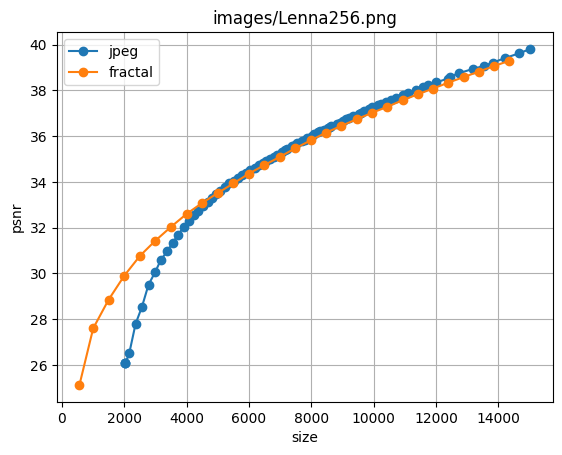

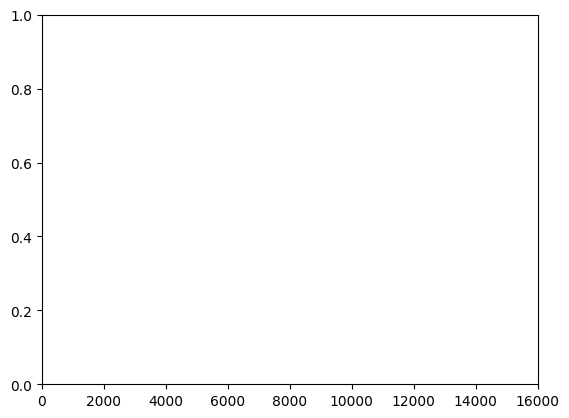

In [3]:
compare_compressors("images/Lenna256.png")

saving jpeg compressed to Lenna256gray.jpg and fractal compressed to Lenna256gray.fract
PSNR: 32.4011
PSNR: 34.614
PSNR: 35.7487
PSNR: 36.5194
PSNR: 37.158
PSNR: 37.7063
PSNR: 38.136
PSNR: 38.5779
PSNR: 38.9565
PSNR: 39.3516
PSNR: 39.709
PSNR: 40.0402
PSNR: 40.3574
PSNR: 40.6555
PSNR: 40.9348
PSNR: 41.2006
PSNR: 41.4279
PSNR: 41.6564
PSNR: 41.8758
PSNR: 42.085
PSNR: 42.28
PSNR: 42.4637
PSNR: 42.6666
PSNR: 42.8372
PSNR: 42.9996
PSNR: 43.1738
PSNR: 43.3154
PSNR: 43.4637
PSNR: 43.5998


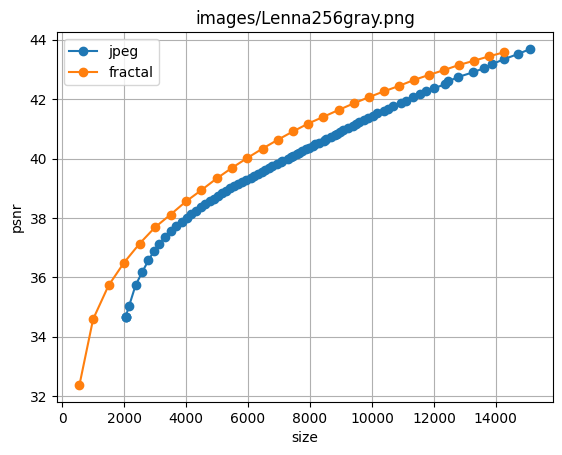

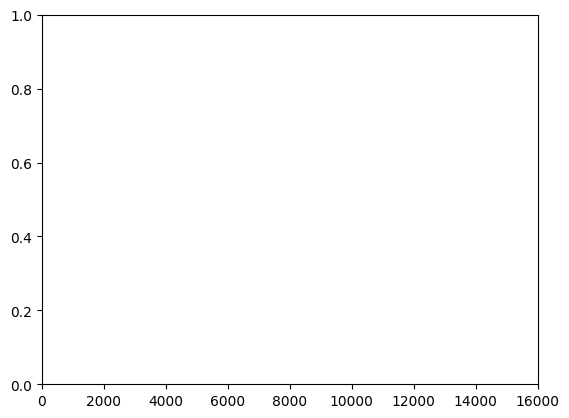

In [4]:
compare_compressors("images/Lenna256gray.png")

saving jpeg compressed to Baboon256.jpg and fractal compressed to Baboon256.fract
PSNR: 21.3965
PSNR: 22.8282
PSNR: 23.5856
PSNR: 24.0683
PSNR: 24.4131
PSNR: 24.7482
PSNR: 25.0149
PSNR: 25.2801
PSNR: 25.5125
PSNR: 25.74
PSNR: 25.9773
PSNR: 26.19
PSNR: 26.3854
PSNR: 26.5805
PSNR: 26.7842
PSNR: 26.9848
PSNR: 27.1768
PSNR: 27.3849
PSNR: 27.5943
PSNR: 27.8055
PSNR: 27.9949
PSNR: 28.1891
PSNR: 28.3715
PSNR: 28.5636
PSNR: 28.7511
PSNR: 28.9251
PSNR: 29.0981
PSNR: 29.2668
PSNR: 29.4325


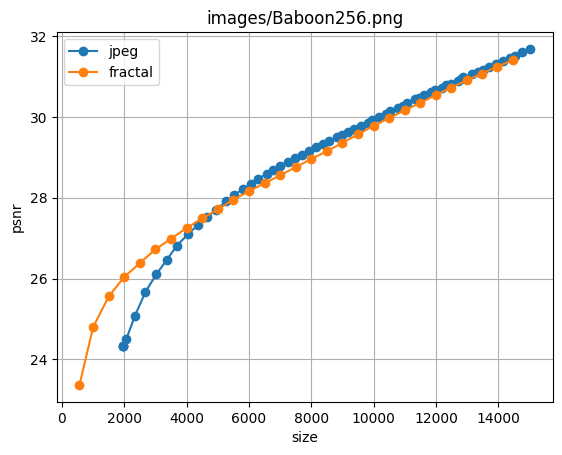

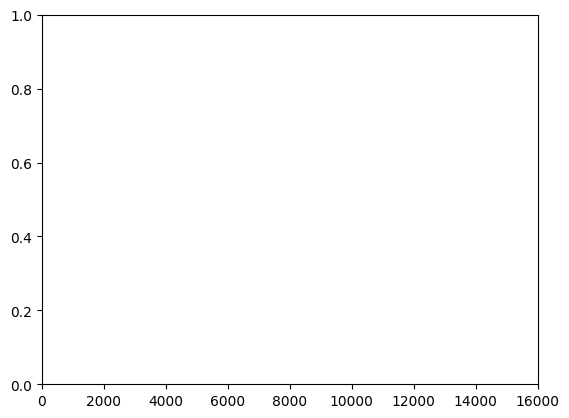

In [5]:
compare_compressors("images/Baboon256.png")

In [ ]:
compare_compressors("images/BlueMarble320.png")

saving jpeg compressed to BlueMarble320.jpg and fractal compressed to BlueMarble320.fract
PSNR: 24.5666
PSNR: 24.9183
PSNR: 26.0811
PSNR: 26.8248
PSNR: 27.3703
PSNR: 27.8284
PSNR: 28.1926
PSNR: 28.538
PSNR: 28.8775
PSNR: 29.173
PSNR: 29.4635
PSNR: 29.721
PSNR: 29.972
PSNR: 30.23
PSNR: 30.462
PSNR: 30.6927
PSNR: 30.9088
PSNR: 31.1289
PSNR: 31.347
PSNR: 31.5546
PSNR: 31.7611
PSNR: 31.9611
PSNR: 32.178


saving jpeg compressed to Lenna512.jpg and fractal compressed to Lenna512.fract
PSNR: 26.2674
PSNR: 26.2674
PSNR: 26.2674
PSNR: 26.2674
PSNR: 26.6124
PSNR: 27.7395
PSNR: 28.442
PSNR: 28.9765
PSNR: 29.4416
PSNR: 29.8487
PSNR: 30.1771
PSNR: 30.4791
PSNR: 30.7431
PSNR: 31.0295
PSNR: 31.2725
PSNR: 31.5381
PSNR: 31.7815
PSNR: 31.985
PSNR: 32.1713
PSNR: 32.3597
PSNR: 32.5155
PSNR: 32.6763
PSNR: 32.8312
PSNR: 32.9872
PSNR: 33.1298
PSNR: 33.2793
PSNR: 33.4044
PSNR: 33.5417
PSNR: 33.6615


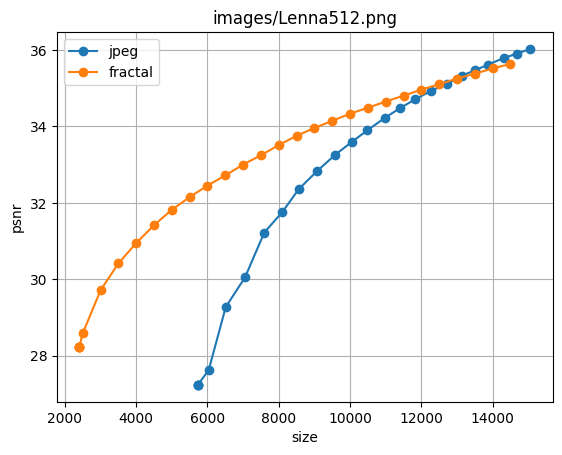

In [7]:
compare_compressors("images/Lenna512.png")